In [1]:
import sys
sys.path.insert(0,'..')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from timeit import default_timer as timer
import matplotlib.animation as animation
from matrixMath import Knotilus
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
methods = 'Nelder-Mead', 'SLSQP', 'pso', 'diffev'

Working on Nelder-Mead
2021-01-18 16:23:17,267 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2021-01-18 16:23:17,274 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
Working on SLSQP
Knot: 4   Iteration: 124   SSE: 10.3698715972107412021-01-18 16:23:37,666 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2021-01-18 16:23:37,669 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2021-01-18 16:23:58,454 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   2%|▏         |4/200, best_cost=10.8Working on pso
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=8.91
2021-01-18 16:24:03,322 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.913662603833718, best pos: [0.72757248 0.8771632  0.32840826 0.05142

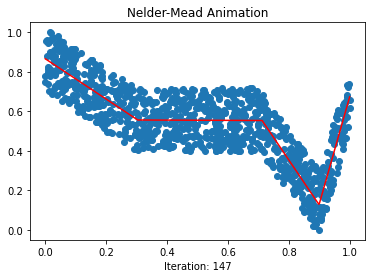

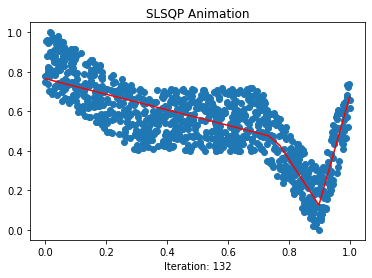

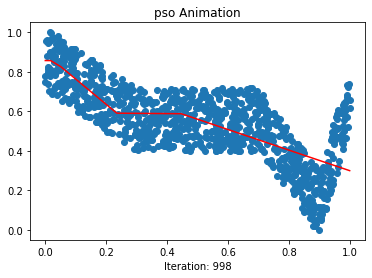

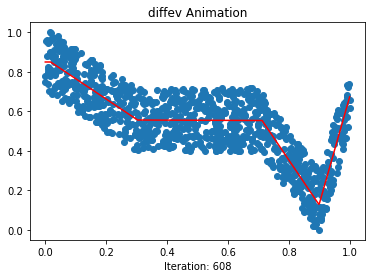

In [7]:
for method in methods:
    print(f'Working on {method}')
    df = pd.read_csv('../data/pw_data3_1000.csv')
    ss  = MinMaxScaler()
    foo = ss.fit_transform(df)
    foo = pd.DataFrame(foo)

    model = Knotilus(foo[0], foo[1])
    model = model.fit(optim=method, numKnots=4, verbose=True, logging=True)

    fig, ax = plt.subplots()

    model.knotLoc = model.log[0]['knotLoc']
    model.coef = model.log[0]['coef']
    model.knots = model.CreateKnots(model.variable, model.knotLoc)
    ax.set_title(f'{method} Animation')
    ax.scatter(foo[0], foo[1])
    line, = ax.plot(foo[0], model.predict(), 'r')

    def animate(i):
        model.knotLoc = model.log[i+1]['knotLoc']
        model.coef = model.log[i+1]['coef']
        model.knots = model.CreateKnots(model.variable, model.knotLoc)
        line.set_ydata(model.predict())  # update the data.
        ax.set_xlabel(f'Iteration: {i}')
        return line,

    ani = animation.FuncAnimation(fig, animate, interval=10, blit=True, save_count=len(model.log)-1)
    ani.save(f'../visualizations/{method}_animation.gif', dpi=150)